# Predictive Power of Big Five Personality Traits: Political Orientation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder as le
from sklearn.model_selection import train_test_split

In [2]:
data_na = pd.read_csv('faces.csv')
data_na = data_na[['ext', 'neu', 'ope', 'agr', 'con', 'pol']]
# which stand for Extraversion, Neuroticism, Openness, Agreeableness, Conscientiousness, Political Orientation; respectively

In [3]:
data = data_na.dropna()

In [4]:
le = le()
le.fit(data.pol)
le.transform(data.pol)

array([1, 1, 0, ..., 1, 0, 1])

In [5]:
list(le.inverse_transform([0,1]))

['conservative', 'liberal']

In [6]:
data.pol = le.transform(data.pol)

C:\Users\tlgru\miniconda3\envs\mlpy3810\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [7]:
data.head()

,ext,neu,ope,agr,con,pol
0,1.022968,-1.084406,1.049730,0.265963,0.328752,1
1,0.367612,1.467204,0.532329,-2.072064,-0.724279,1
2,0.558261,-1.740534,-0.570139,0.650702,0.679762,0
3,0.558261,0.634025,0.438256,-0.503514,-2.128320,1
4,1.301793,-0.990673,0.802995,-0.657410,1.171176,1


In [8]:
data_train, data_test = train_test_split(data, test_size=.2, random_state=0)

## Dataset Statistics

In [9]:
data_train.shape

(79178, 6)

In [10]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79178 entries, 221828 to 426713
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ext     79178 non-null  float64
 1   neu     79178 non-null  float64
 2   ope     79178 non-null  float64
 3   agr     79178 non-null  float64
 4   con     79178 non-null  float64
 5   pol     79178 non-null  int32  
dtypes: float64(5), int32(1)
memory usage: 3.9 MB


In [11]:
data_train.describe()

,ext,neu,ope,agr,con,pol
count,79178.000000,79178.000000,79178.000000,79178.000000,79178.000000,79178.000000
mean,0.118370,0.002756,-0.128562,-0.017308,0.050439,0.621195
std,1.013957,1.014136,1.084576,1.063753,1.021256,0.485092
min,-3.159398,-2.177953,-4.861184,-3.966163,-3.532360,0.000000
25%,-0.615737,-0.719890,-0.784691,-0.657410,-0.724279,0.000000
50%,0.248456,0.009141,0.030607,0.112068,0.047943,1.000000
75%,0.868066,0.634025,0.717174,0.650702,0.749964,1.000000
max,1.797481,2.821120,1.661204,2.189657,2.083802,1.000000


In [12]:
data_train.skew()

ext   -0.455168
neu    0.194219
ope   -0.632350
agr   -0.475542
con   -0.214014
pol   -0.499692
dtype: float64

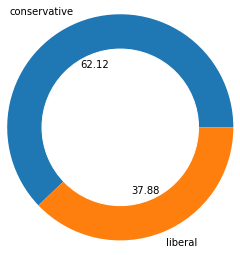

In [13]:
plt.pie(data_train.pol.value_counts(), labels=['conservative','liberal'], autopct='%.2f', radius=1.3)
white_circle = plt.Circle((0,0), 0.9, color='white')
plt.gcf().gca().add_artist(white_circle)

<AxesSubplot:>

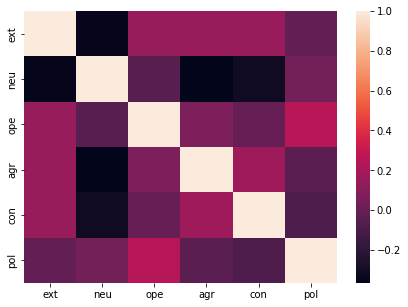

In [14]:
corr = data_train.corr()
plt.subplots(figsize=(7, 5))
sns.heatmap(corr)

<AxesSubplot:xlabel='ext', ylabel='Count'>

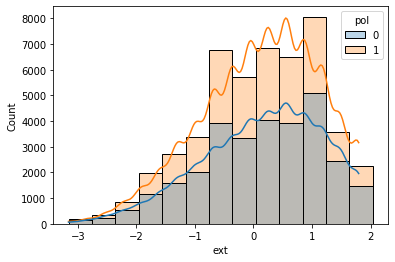

In [15]:
sns.histplot(data_train, x='ext', hue='pol', kde=True, alpha=.3, binwidth=.4)

<AxesSubplot:xlabel='neu', ylabel='Count'>

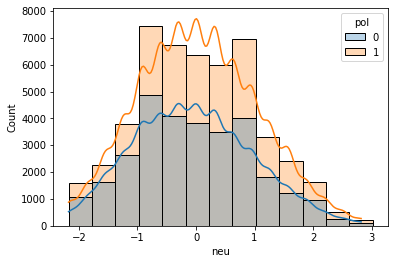

In [16]:
sns.histplot(data_train, x='neu', hue='pol', kde=True, alpha=.3, binwidth=.4)

<AxesSubplot:xlabel='ope', ylabel='Count'>

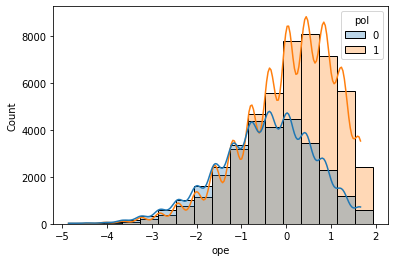

In [17]:
sns.histplot(data_train, x='ope', hue='pol', kde=True, alpha=.3, binwidth=.4)

<AxesSubplot:xlabel='agr', ylabel='Count'>

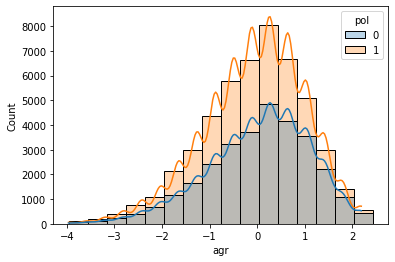

In [18]:
sns.histplot(data_train, x='agr', hue='pol', kde=True, alpha=.3, binwidth=.4)

<AxesSubplot:xlabel='con', ylabel='Count'>

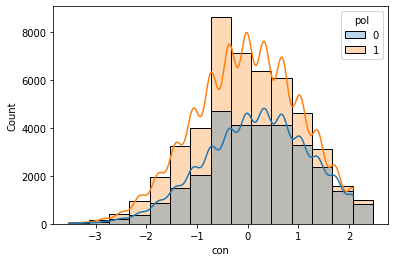

In [19]:
sns.histplot(data_train, x='con', hue='pol', kde=True, alpha=.3, binwidth=.4)

## Modeling

In [20]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score

In [21]:
X = data.drop('pol',axis=1)
y = data.pol

In [23]:
logreg = LogisticRegressionCV(cv=3,penalty='elasticnet',solver='saga',l1_ratios=[.3,.5,.7],scoring='roc_auc').fit(X,y)

In [25]:
logreg.scores_[1].max()

0.6725783320488896